# Proof of concept
First try to run the model

In [ ]:
!pip install easyocr

<img src="easyocr_framework.jpeg">

In [18]:
import easyocr
reader = easyocr.Reader(['en'], gpu=False) # this needs to run only once to load the model into memory

Using CPU. Note: This module is much faster with a GPU.


In [19]:
result = reader.readtext('../random_images/code_example.png', detail=0)
print(result)

['Example:', '>>', 'from', 'transformers import TrOCRForCausalLM,', 'TrOCRConfig', '>>', '#', 'Initializing', 'TrOCR-base style configuration', '>>', 'configuration', 'TrOCRConfig( )', '>>', '#', 'Initializing', 'model', 'from', 'the', 'TrOCR-base style configuration', '>>', 'model', 'TrOCRForCausalLM(configuration)', '>>', '#', 'Accessing', 'the model', 'configuration', '>>', 'configuration', 'model.config']


# Try to run the model on the nutrition lable photos

In [20]:
%pylab inline
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt

import json
from pprint import pprint
import yaml
from constants import sample_img_ids_v0
from tools import explore_image, find_complete_data, get_file_paths

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [21]:
with open("config.yml", "r") as ymlfile:
    cfg = yaml.load(ymlfile, Loader=yaml.FullLoader)
    
base_path = cfg["base_path"]

In [22]:
# Find 10 images where id is available in all 4 directories
ids = find_complete_data(base_path)
print("Images with full data available: %s" %len(ids))

Count of available images: 2362
Images with full data available: 32


image id: 3564700128091


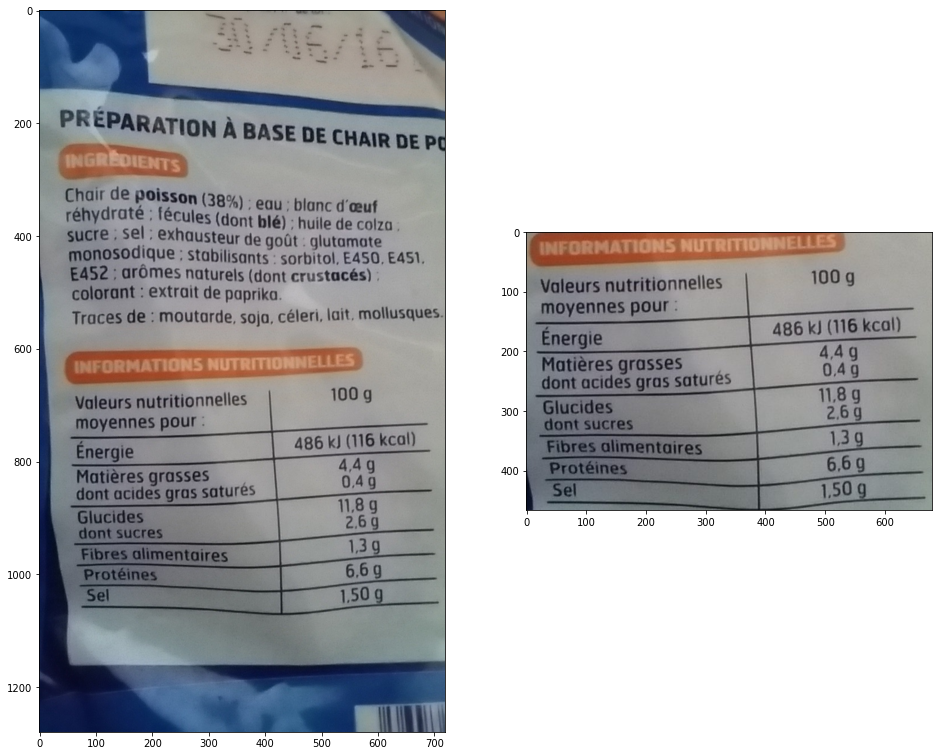

{'sugars': 2.5, 'sodium_value': 0.68, 'salt_unit': 'g', 'fiber_value': 1, 'sodium_100g': 0.68, 'energy_serving': 437, 'salt_value': 1.7, 'sugars_serving': 2.25, 'sugars_value': 2.5, 'sodium': 0.68, 'nutrition-score-fr': 3, 'fat_value': 4.2, 'nova-group_100g': 4, 'carbon-footprint-from-known-ingredients_serving': 393, 'nutrition-score-fr_100g': 3, 'nutrition-score-uk_serving': 3, 'proteins_100g': 7, 'salt_100g': 1.7, 'fat': 4.2, 'carbon-footprint-from-known-ingredients_product': 787, 'saturated-fat_100g': 0.4, 'carbohydrates_value': 12, 'proteins': 7, 'fiber_unit': 'g', 'sodium_unit': 'g', 'salt_serving': 1.53, 'sodium_serving': 0.612, 'saturated-fat_unit': 'g', 'carbohydrates': 12, 'energy_unit': 'kJ', 'sugars_100g': 2.5, 'nutrition-score-uk_100g': 3, 'energy_100g': 486, 'sugars_unit': 'g', 'energy': 486, 'fiber': 1, 'nutrition-score-uk': 3, 'saturated-fat': 0.4, 'fiber_100g': 1, 'salt': 1.7, 'proteins_serving': 6.3, 'nova-group_serving': 4, 'fat_serving': 3.78, 'carbohydrates_100g': 1

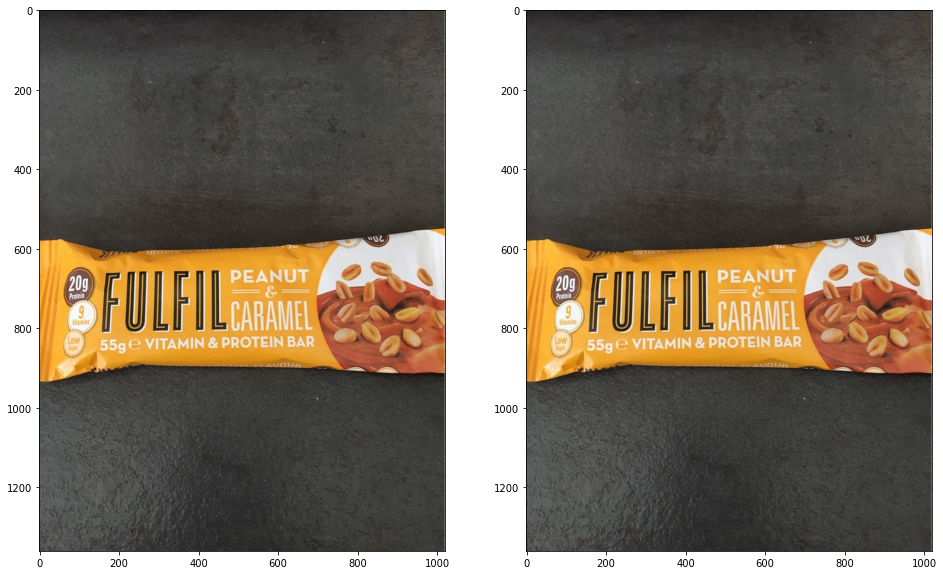

{'energy': 1561, 'fiber': 16.1, 'saturated-fat': 7.9, 'energy_100g': 1561, 'sugars_unit': '', 'energy_unit': 'kcal', 'sugars_100g': 3.3, 'saturated-fat_unit': '', 'carbohydrates': 18.8, 'energy_value': 373, 'proteins_unit': '', 'nova-group': 4, 'saturated-fat_value': 7.9, 'proteins_value': 36.3, 'carbohydrates_100g': 18.8, 'carbohydrates_unit': '', 'fat_100g': 15.9, 'fat_unit': '', 'fiber_100g': 16.1, 'salt': 0.73, 'nova-group_serving': 4, 'sodium': 0.292, 'nova-group_100g': 4, 'fat_value': 15.9, 'salt_value': 0.73, 'sugars_value': 3.3, 'salt_unit': '', 'sodium_100g': 0.292, 'fiber_value': 16.1, 'sugars': 3.3, 'sodium_value': 0.292, 'proteins': 36.3, 'fiber_unit': '', 'sodium_unit': 'g', 'saturated-fat_100g': 7.9, 'carbohydrates_value': 18.8, 'salt_100g': 0.73, 'fat': 15.9, 'proteins_100g': 36.3}
--------------------------------------------------
****************************************************************************************************
image id: 3700952000918


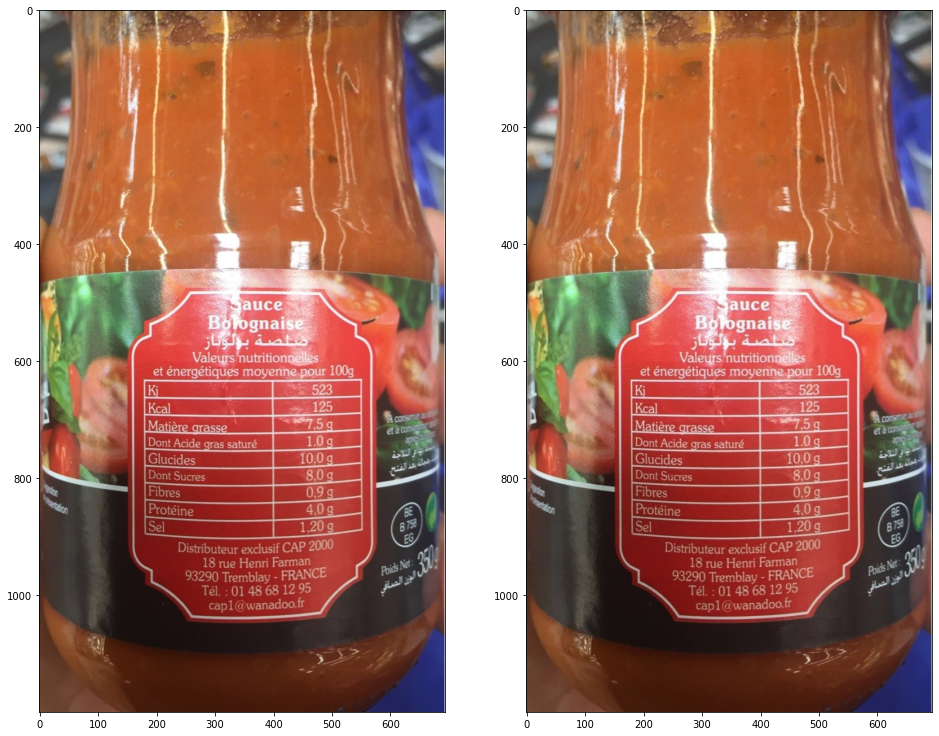

{'carbohydrates_value': 10, 'saturated-fat_100g': 1, 'sodium_unit': 'g', 'proteins': 4, 'proteins_100g': 4, 'fat': 7.5, 'salt_100g': 1.2, 'salt_value': 1.2, 'sugars_value': 8, 'fat_value': 7.5, 'sodium': 0.48, 'sugars': 8, 'sodium_value': 0.48, 'sodium_100g': 0.48, 'salt_unit': '', 'saturated-fat_value': 1, 'proteins_value': 4, 'proteins_unit': '', 'energy_value': 125, 'salt': 1.2, 'fat_unit': '', 'carbohydrates_100g': 10, 'fat_100g': 7.5, 'carbohydrates_unit': '', 'energy_100g': 523, 'sugars_unit': '', 'saturated-fat': 1, 'energy': 523, 'carbohydrates': 10, 'saturated-fat_unit': '', 'sugars_100g': 8, 'energy_unit': 'kcal'}
--------------------------------------------------
****************************************************************************************************
image id: 8420056010105


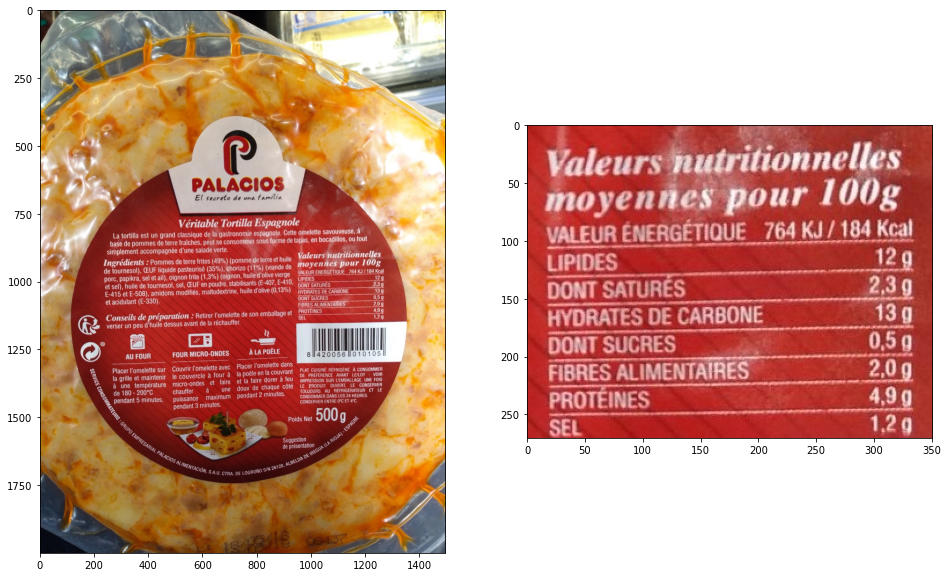

{'nova-group_100g': 4, 'nutrition-score-fr': 6, 'fat_value': 12, 'sodium': 0.48, 'sugars_value': 0.5, 'salt_value': 1.2, 'sodium_100g': 0.48, 'salt_unit': 'g', 'sodium_value': 0.48, 'sugars': 0.5, 'fruits-vegetables-nuts': 0, 'fruits-vegetables-nuts_serving': 0, 'sodium_unit': 'g', 'proteins': 4.9, 'carbohydrates_value': 13, 'saturated-fat_100g': 2.3, 'carbon-footprint-from-known-ingredients_product': 457, 'fat': 12, 'salt_100g': 1.2, 'proteins_100g': 4.9, 'nutrition-score-uk_serving': 6, 'nutrition-score-fr_100g': 6, 'saturated-fat': 2.3, 'nutrition-score-uk': 6, 'energy': 764, 'sugars_unit': 'g', 'energy_100g': 764, 'sugars_100g': 0.5, 'nutrition-score-uk_100g': 6, 'energy_unit': 'kJ', 'carbohydrates': 13, 'saturated-fat_unit': 'g', 'nova-group': 4, 'proteins_unit': 'g', 'energy_value': 764, 'proteins_value': 4.9, 'saturated-fat_value': 2.3, 'nutrition-score-fr_serving': 6, 'fat_unit': 'g', 'carbohydrates_unit': 'g', 'fat_100g': 12, 'carbohydrates_100g': 13, 'carbon-footprint-from-kn

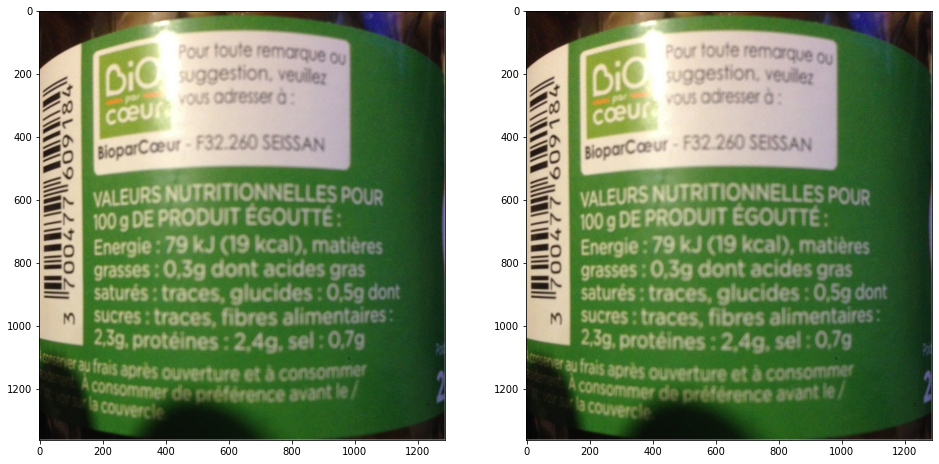

{'fiber': 2.3, 'energy': 79, 'saturated-fat': 0, 'sugars_unit': '', 'energy_100g': 79, 'energy_unit': 'kcal', 'sugars_100g': 0, 'carbohydrates': 0.5, 'saturated-fat_unit': '', 'energy_value': 19, 'proteins_unit': '', 'proteins_value': 2.4, 'saturated-fat_value': 0, 'fat_100g': 0.3, 'carbohydrates_unit': '', 'carbohydrates_100g': 0.5, 'fat_unit': '', 'salt': 0.7, 'fiber_100g': 2.3, 'sodium': 0.28, 'fat_value': 0.3, 'sugars_value': 0, 'salt_value': 0.7, 'salt_unit': '', 'fiber_value': 2.3, 'sodium_100g': 0.28, 'sodium_value': 0.28, 'sugars': 0, 'proteins': 2.4, 'fiber_unit': '', 'sodium_unit': 'g', 'saturated-fat_100g': 0, 'carbohydrates_value': 0.5, 'salt_100g': 0.7, 'fat': 0.3, 'proteins_100g': 2.4}
--------------------------------------------------
****************************************************************************************************
image id: 3564700470107


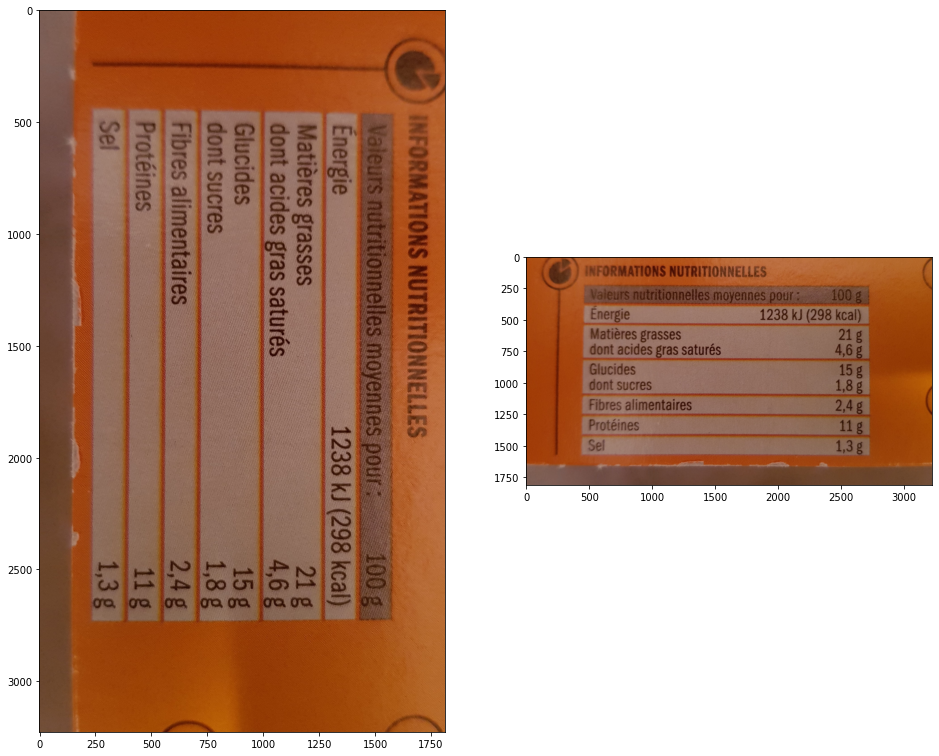

{'salt_100g': 1.3, 'carbon-footprint-from-known-ingredients_product': 451, 'fat': 21, 'nutrition-score-uk_serving': 10, 'nutrition-score-fr_100g': 10, 'proteins_100g': 11, 'carbon-footprint-from-meat-or-fish_100g': 225.4, 'fiber_unit': 'g', 'proteins': 11, 'sodium_unit': 'g', 'saturated-fat_100g': 4.6, 'carbohydrates_value': 15, 'salt_unit': 'g', 'fiber_value': 2.4, 'sodium_100g': 0.52, 'sodium_value': 0.52, 'sugars': 1.8, 'sodium': 0.52, 'nutrition-score-fr': 10, 'fat_value': 21, 'nova-group_100g': 4, 'sugars_value': 1.8, 'salt_value': 1.3, 'carbohydrates_unit': 'g', 'fat_100g': 21, 'carbon-footprint-from-known-ingredients_100g': 225.4, 'carbohydrates_100g': 15, 'nutrition-score-fr_serving': 10, 'fat_unit': 'g', 'salt': 1.3, 'fiber_100g': 2.4, 'nova-group_serving': 4, 'energy_value': 1238, 'nova-group': 4, 'proteins_unit': 'g', 'proteins_value': 11, 'saturated-fat_value': 4.6, 'energy_unit': 'kJ', 'sugars_100g': 1.8, 'nutrition-score-uk_100g': 10, 'carbon-footprint-from-meat-or-fish_p

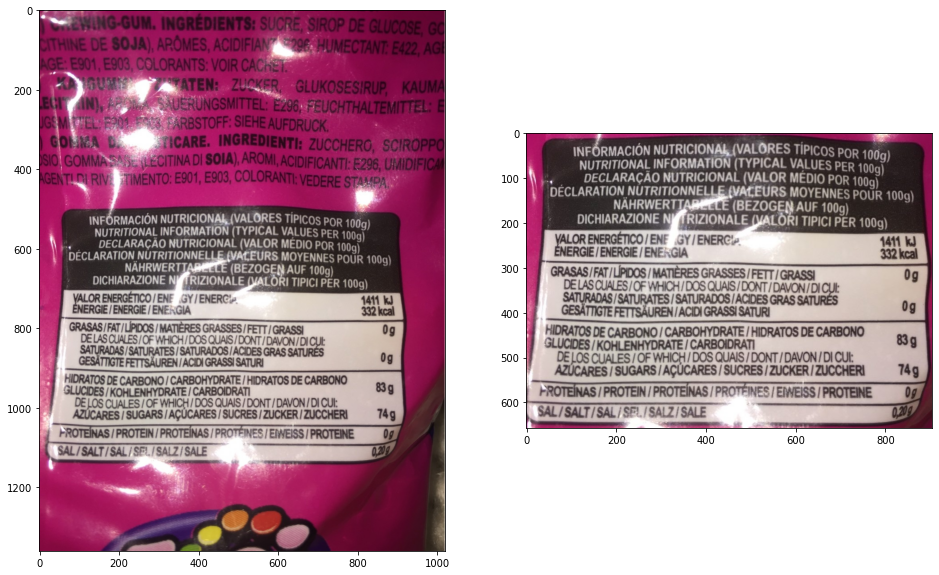

{'saturated-fat_value': 0, 'proteins_value': 0, 'proteins_unit': 'g', 'nova-group': 4, 'energy_value': 332, 'nova-group_serving': 4, 'salt': 0.2, 'fat_unit': 'g', 'nutrition-score-fr_serving': 14, 'carbohydrates_100g': 83, 'fat_100g': 0, 'carbohydrates_unit': 'g', 'energy_100g': 1389, 'sugars_unit': 'g', 'nutrition-score-uk': 14, 'saturated-fat': 0, 'energy': 1389, 'carbohydrates': 83, 'saturated-fat_unit': 'g', 'sugars_100g': 74, 'nutrition-score-uk_100g': 14, 'energy_unit': 'kcal', 'carbohydrates_value': 83, 'saturated-fat_100g': 0, 'sodium_unit': 'g', 'proteins': 0, 'proteins_100g': 0, 'nutrition-score-fr_100g': 14, 'nutrition-score-uk_serving': 14, 'fat': 0, 'salt_100g': 0.2, 'salt_value': 0.2, 'sugars_value': 74, 'nova-group_100g': 4, 'nutrition-score-fr': 14, 'fat_value': 0, 'sodium': 0.08, 'sugars': 74, 'sodium_value': 0.08, 'sodium_100g': 0.08, 'salt_unit': 'g'}
--------------------------------------------------
******************************************************************

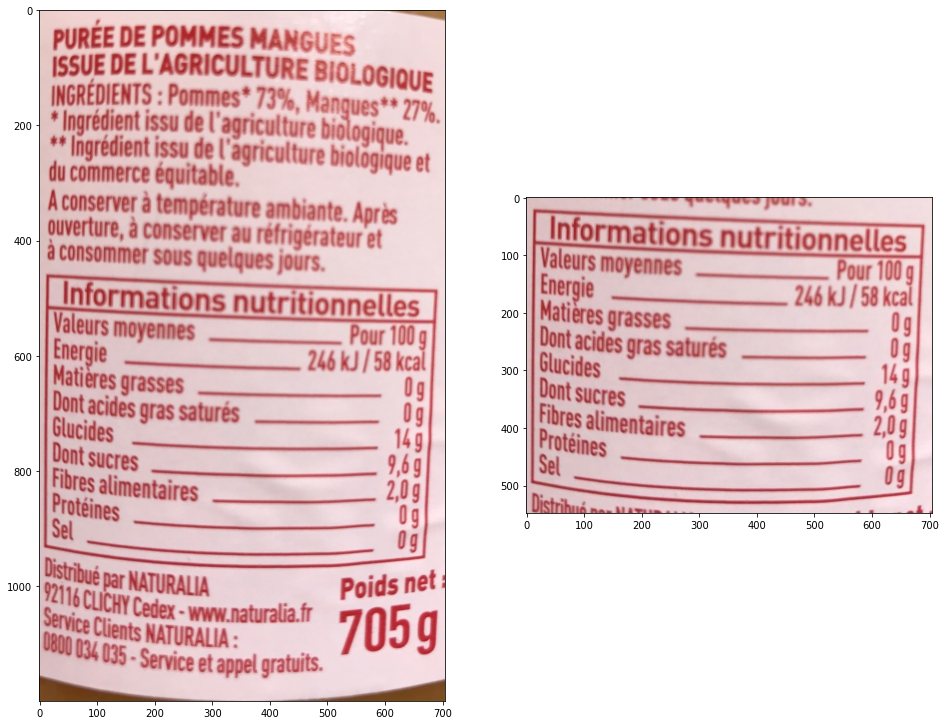

{'fruits-vegetables-nuts-estimate_unit': '', 'energy': 243, 'fiber': 2, 'saturated-fat': 0, 'nutrition-score-uk': -5, 'sugars_unit': 'g', 'fruits-vegetables-nuts-estimate_serving': 100, 'energy_100g': 243, 'energy_unit': 'kcal', 'fruits-vegetables-nuts-estimate_100g': 100, 'sugars_100g': 9.6, 'nutrition-score-uk_100g': -5, 'carbohydrates': 14, 'saturated-fat_unit': 'g', 'energy_value': 58, 'nova-group': 1, 'proteins_unit': 'g', 'proteins_value': 0, 'saturated-fat_value': 0, 'fat_100g': 0, 'carbohydrates_unit': 'g', 'carbon-footprint-from-known-ingredients_100g': 116.5, 'carbohydrates_100g': 14, 'nutrition-score-fr_serving': -5, 'fat_unit': 'g', 'salt': 0, 'fiber_100g': 2, 'nova-group_serving': 1, 'sodium': 0, 'nutrition-score-fr': -5, 'fat_value': 0, 'nova-group_100g': 1, 'sugars_value': 9.6, 'salt_value': 0, 'salt_unit': 'g', 'fiber_value': 2, 'sodium_100g': 0, 'sodium_value': 0, 'fruits-vegetables-nuts-estimate_value': 100, 'sugars': 9.6, 'proteins': 0, 'fiber_unit': 'g', 'sodium_uni

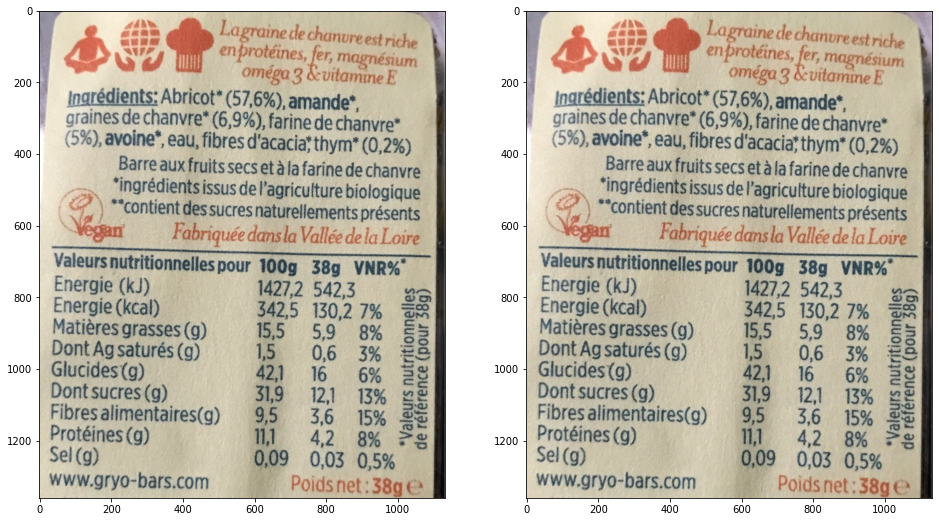

{'saturated-fat_value': 1.5, 'proteins_value': 11.1, 'energy_value': 342, 'proteins_unit': '', 'salt': 0.1, 'fiber_100g': 9.5, 'carbohydrates_100g': 42.1, 'carbon-footprint-from-known-ingredients_100g': 63.36, 'carbohydrates_unit': '', 'fat_100g': 15.5, 'fat_unit': '', 'energy_100g': 1431, 'sugars_unit': '', 'fiber': 9.5, 'energy': 1431, 'saturated-fat': 1.5, 'saturated-fat_unit': '', 'carbohydrates': 42.1, 'energy_unit': 'kcal', 'sugars_100g': 31.9, 'saturated-fat_100g': 1.5, 'carbohydrates_value': 42.1, 'proteins': 11.1, 'fiber_unit': '', 'sodium_unit': 'g', 'proteins_100g': 11.1, 'salt_100g': 0.1, 'fat': 15.5, 'carbon-footprint-from-known-ingredients_product': 24.1, 'salt_value': 0.1, 'sugars_value': 31.9, 'sodium': 0.04, 'fat_value': 15.5, 'sugars': 31.9, 'sodium_value': 0.04, 'salt_unit': '', 'fiber_value': 9.5, 'sodium_100g': 0.04}
--------------------------------------------------
***************************************************************************************************

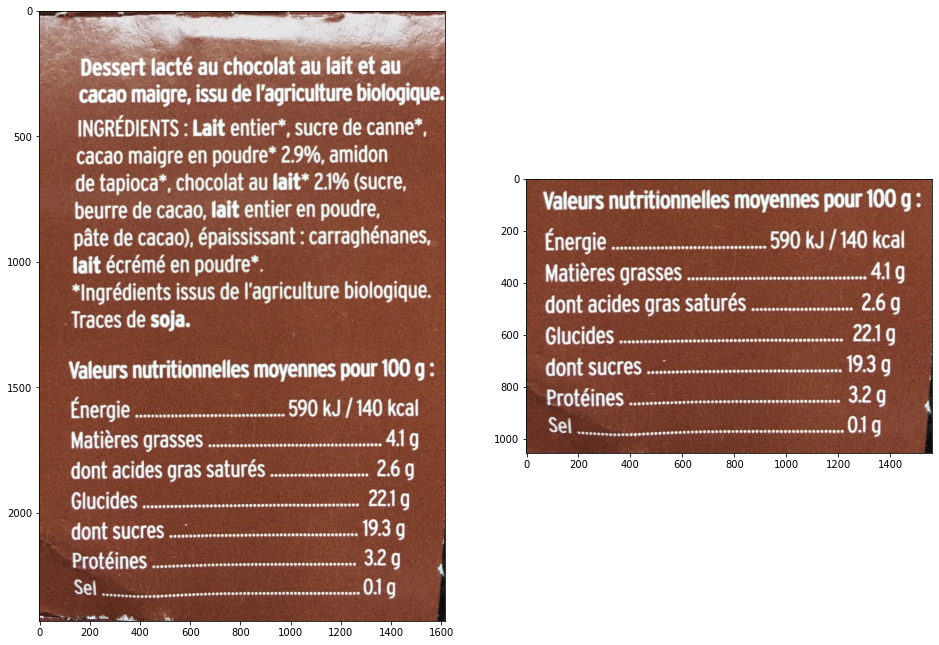

{'sodium_value': 0.04, 'sugars': 19.3, 'salt_unit': '', 'sodium_100g': 0.04, 'sugars_value': 19.3, 'salt_value': 0.1, 'sodium': 0.04, 'fat_value': 4.1, 'nutrition-score-fr': 6, 'nova-group_100g': 4, 'proteins_100g': 3.2, 'nutrition-score-uk_serving': 6, 'nutrition-score-fr_100g': 6, 'salt_100g': 0.1, 'carbon-footprint-from-known-ingredients_product': 49.6, 'fat': 4.1, 'saturated-fat_100g': 2.6, 'carbohydrates_value': 22.1, 'proteins': 3.2, 'sodium_unit': 'g', 'carbohydrates': 22.1, 'saturated-fat_unit': '', 'energy_unit': 'kcal', 'nutrition-score-uk_100g': 6, 'sugars_100g': 19.3, 'sugars_unit': '', 'energy_100g': 586, 'energy': 586, 'saturated-fat': 2.6, 'nutrition-score-uk': 6, 'salt': 0.1, 'nova-group_serving': 4, 'fat_100g': 4.1, 'carbohydrates_unit': '', 'carbon-footprint-from-known-ingredients_100g': 12.39, 'carbohydrates_100g': 22.1, 'nutrition-score-fr_serving': 6, 'fat_unit': '', 'proteins_value': 3.2, 'saturated-fat_value': 2.6, 'energy_value': 140, 'nova-group': 4, 'proteins_

In [56]:
total_displayed_images = 0

for img_id in ids[:10]:
    try:
        explore_image(img_id, base_path)
        total_displayed_images += 1
    except:
        continue
        
print("Total displayed images: %d" %total_displayed_images)

In [39]:
import easyocr
import pandas as pd
reader = easyocr.Reader(['fr' ], gpu=False)

Using CPU. Note: This module is much faster with a GPU.


In [40]:
img, cropped_img, json_file_path, cropped_json_file_path = get_file_paths(ids[0], base_path)
easy_ocr_result = reader.readtext(cropped_img, detail=0)
print(easy_ocr_result)

['{MFoRMaTiOns NUTRITIONNELLES', 'Valeurs nutritionnelles', '100 g', 'moyennes', '486 kJ (116 kcal)', 'Énergie', '4,49', 'Matières grasses', '0,49', 'dont acides grus soturés', '71,8 9', 'Glucides', '2,69', 'dont sucres', '1,39', 'Fibres alimentaires', 'Protéines', '6,69', 'Sel', '9', 'pour', '1,50']


In [51]:
import json
def has_number(input_string):
    for char in input_string:
        if char.isdigit():
            return True
    return False
def format_ocr_results(ocr_results):
    result_dict = {}
    current_key = None

    for item in ocr_results:
        if has_number(item):
            if current_key is not None:
                result_dict[current_key] = item
                current_key = None
        else:
            if current_key is not None:
                current_key += " " + item
            else:
                current_key = item

    return result_dict

# Sample OCR results list


# Formatting OCR results into JSON key-value format
formatted_data = format_ocr_results(easy_ocr_result)

# Print the formatted JSON
# display json as table
df_easy_ocr = pd.DataFrame.from_dict(formatted_data, orient='index').reset_index()
df_easy_ocr.columns = ['key', 'value']
df_easy_ocr.head(10)



key              value
0  {MFoRMaTiOns NUTRITIONNELLES Valeurs nutrition...              100 g
1                                           moyennes  486 kJ (116 kcal)
2                                            Énergie               4,49
3                                   Matières grasses               0,49
4                           dont acides grus soturés             71,8 9
5                                           Glucides               2,69
6                                        dont sucres               1,39
7                      Fibres alimentaires Protéines               6,69
8                                                Sel                  9
9                                               pour               1,50

In [54]:
nutrition_json = {'sugars': 2.5, 'sodium_value': 0.68, 'salt_unit': 'g', 'fiber_value': 1, 'sodium_100g': 0.68, 'energy_serving': 437, 'salt_value': 1.7, 'sugars_serving': 2.25, 'sugars_value': 2.5, 'sodium': 0.68, 'nutrition-score-fr': 3, 'fat_value': 4.2, 'nova-group_100g': 4, 'carbon-footprint-from-known-ingredients_serving': 393, 'nutrition-score-fr_100g': 3, 'nutrition-score-uk_serving': 3, 'proteins_100g': 7, 'salt_100g': 1.7, 'fat': 4.2, 'carbon-footprint-from-known-ingredients_product': 787, 'saturated-fat_100g': 0.4, 'carbohydrates_value': 12, 'proteins': 7, 'fiber_unit': 'g', 'sodium_unit': 'g', 'salt_serving': 1.53, 'sodium_serving': 0.612, 'saturated-fat_unit': 'g', 'carbohydrates': 12, 'energy_unit': 'kJ', 'sugars_100g': 2.5, 'nutrition-score-uk_100g': 3, 'energy_100g': 486, 'sugars_unit': 'g', 'energy': 486, 'fiber': 1, 'nutrition-score-uk': 3, 'saturated-fat': 0.4, 'fiber_100g': 1, 'salt': 1.7, 'proteins_serving': 6.3, 'nova-group_serving': 4, 'fat_serving': 3.78, 'carbohydrates_100g': 12, 'carbon-footprint-from-known-ingredients_100g': 437, 'fat_100g': 4.2, 'carbohydrates_unit': 'g', 'fat_unit': 'g', 'nutrition-score-fr_serving': 3, 'carbohydrates_serving': 10.8, 'saturated-fat_value': 0.4, 'proteins_value': 7, 'energy_value': 486, 'fiber_serving': 0.9, 'proteins_unit': 'g', 'nova-group': 4, 'saturated-fat_serving': 0.36}
# display json as table
df_nutrition = pd.DataFrame.from_dict(nutrition_json, orient='index').reset_index()
df_nutrition.columns = ['key_baseline', 'value_baseline']
df_nutrition.head(10)

key_baseline value_baseline
0          sugars            2.5
1    sodium_value           0.68
2       salt_unit              g
3     fiber_value              1
4     sodium_100g           0.68
5  energy_serving            437
6      salt_value            1.7
7  sugars_serving           2.25
8    sugars_value            2.5
9          sodium           0.68

In [55]:
# Print rows of df_nutrition and df_easy_ocr in one dataframe
comparison_df = pd.concat([df_nutrition, df_easy_ocr], axis=1)
comparison_df

key_baseline value_baseline  \
0                                            sugars            2.5   
1                                      sodium_value           0.68   
2                                         salt_unit              g   
3                                       fiber_value              1   
4                                       sodium_100g           0.68   
5                                    energy_serving            437   
6                                        salt_value            1.7   
7                                    sugars_serving           2.25   
8                                      sugars_value            2.5   
9                                            sodium           0.68   
10                               nutrition-score-fr              3   
11                                        fat_value            4.2   
12                                  nova-group_100g              4   
13  carbon-footprint-from-known-ingredients_serving            393   
14                          nutrition-score-fr_100g              3   
15                       nutrition-score-uk_serving              3   
16                                    proteins_100g              7   
17                                        salt_100g            1.7   
18                                              fat            4.2   
19  carbon-footprint-from-known-ingredients_product            787   
20                               saturated-fat_100g            0.4   
21                              carbohydrates_value             12   
22                                         proteins              7   
23                                       fiber_unit              g   
24                                      sodium_unit              g   
25                                     salt_serving           1.53   
26                                   sodium_serving          0.612   
27                               saturated-fat_unit              g   
28                                    carbohydrates             12   
29                                      energy_unit             kJ   
30                                      sugars_100g            2.5   
31                          nutrition-score-uk_100g              3   
32                                      energy_100g            486   
33                                      sugars_unit              g   
34                                           energy            486   
35                                            fiber              1   
36                               nutrition-score-uk              3   
37                                    saturated-fat            0.4   
38                                       fiber_100g              1   
39                                             salt            1.7   
40                                 proteins_serving            6.3   
41                               nova-group_serving              4   
42                                      fat_serving           3.78   
43                               carbohydrates_100g             12   
44     carbon-footprint-from-known-ingredients_100g            437   
45                                         fat_100g            4.2   
46                               carbohydrates_unit              g   
47                                         fat_unit              g   
48                       nutrition-score-fr_serving              3   
49                            carbohydrates_serving           10.8   
50                              saturated-fat_value            0.4   
51                                   proteins_value              7   
52                                     energy_value            486   
53                                    fiber_serving            0.9   
54                                    proteins_unit              g   
55                                       nova-group              4   
56                            saturated-fat_servi